In [1]:
""""
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
"""""

import tensorflow as tf
from tensorflow.keras.utils import plot_model
import pydot
from tensorflow.keras.models import Model

## Sequential API

Here is how we use the `Sequential()` class to build a model.

In [2]:
def build_model_with_sequential():
    
    # instantiate a Sequential class and linearly stack the layers of your model
    seq_model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                            tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                            tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
    return seq_model

## Functional API

And here is how you build the same model above with the functional syntax.

In [3]:
def build_model_with_functional():
    
    # instantiate the input Tensor
    input_layer = tf.keras.Input(shape=(28, 28))
    
    # stack the layers using the syntax: new_layer()(previous_layer)
    flatten_layer = tf.keras.layers.Flatten()(input_layer)
    first_dense = tf.keras.layers.Dense(128, activation=tf.nn.relu)(flatten_layer)
    output_layer = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(first_dense)
    
    # declare inputs and outputs
    func_model = Model(inputs=input_layer, outputs=output_layer)
    
    return func_model

## Build the model and visualize the model graph

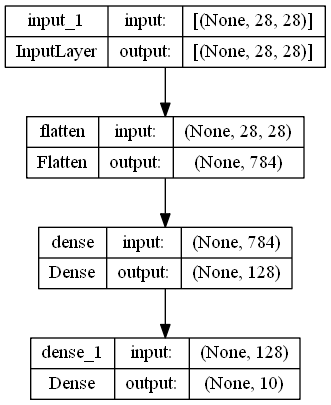

In [4]:
model = build_model_with_functional()
#model = build_model_with_sequential()

# Plot model graph
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

# None means , the model does not know how many of 28* 28 of images will input

In [6]:
# prepare fashion mnist dataset
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
# configure, train, and evaluate the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

In [ ]:
model.evaluate(test_images, test_labels)